In [145]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [147]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [149]:
NUM_CLASSES = 12

# 学習データ読み込み

In [151]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [152]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [155]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [156]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 12)             │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202 (4.70 KB)

 Trainable params: 1,202 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [158]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [160]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.1016 - loss: 2.5380
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0676 - loss: 2.5404 - val_accuracy: 0.1422 - val_loss: 2.4706
Epoch 2/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0859 - loss: 2.4932
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0906 - loss: 2.4771 - val_accuracy: 0.3089 - val_loss: 2.4255
Epoch 3/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0859 - loss: 2.4483
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1205 - loss: 2.4366 - val_accuracy: 0.1533 - val_loss: 2.4031
Epoch 4/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1562 - loss: 2.4291
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [161]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.1081


In [162]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [163]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[4.4775143e-07 1.1002701e-21 1.1958894e-03 2.5639266e-16 1.9504919e-27
 7.1151321e-11 2.0702803e-01 7.9172665e-01 2.2220979e-21 4.1837117e-15
 1.3565879e-18 4.8994996e-05]
7


# 混同行列

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


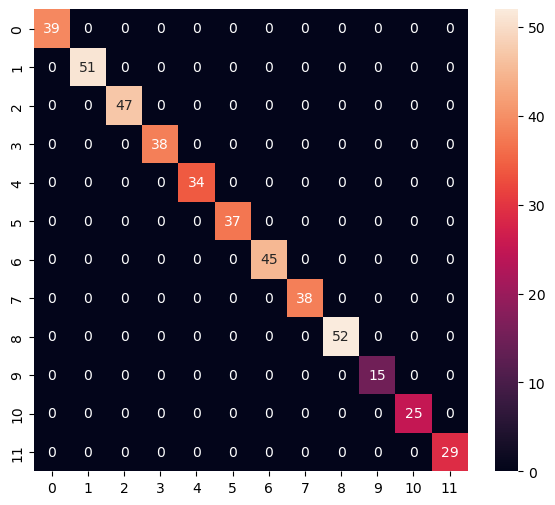

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        38
           8       1.00      1.00      1.00        52
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        29

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [167]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [168]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\sabbi\AppData\Local\Temp\tmpubfau4fo\assets


INFO:tensorflow:Assets written to: C:\Users\sabbi\AppData\Local\Temp\tmpubfau4fo\assets


Saved artifact at 'C:\Users\sabbi\AppData\Local\Temp\tmpubfau4fo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  2448804465552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2448804464784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2448804463632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2448804467088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2448758050256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2448758060624: TensorSpec(shape=(), dtype=tf.resource, name=None)


6924

# 推論テスト

In [170]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\sabbi\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [171]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [172]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [173]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [174]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.4775223e-07 1.1002700e-21 1.1958916e-03 2.5639362e-16 1.9504990e-27
 7.1151453e-11 2.0702803e-01 7.9172665e-01 2.2220975e-21 4.1837113e-15
 1.3565878e-18 4.8995043e-05]
7
